<center><img src="./images/DLI Header.png" alt="Header" style="width: 400px;"/></center>

<h1 style="background-color:#76b900;"></h1>

# DLI Ambassador Project - Part II

### Interactive Clock Reader - Training with Data only, No Camera

In [47]:
!pip install livelossplot --quiet

In [70]:
import torchvision.transforms as transforms
from dataset import ImageClassificationDataset

TASK = 'clock_fingers'
# TASK = 'thumbs'
# TASK = 'emotions'
# TASK = 'fingers'
# TASK = 'diy'

CATEGORIES = ['1', '2', '3', '4', '5', '6','7','8','9','10','11','12']
# CATEGORIES = ['thumbs_up', 'thumbs_down']
# CATEGORIES = ['none', 'happy', 'sad', 'angry']
# CATEGORIES = ['1', '2', '3', '4', '5']
# CATEGORIES = [ 'diy_1', 'diy_2', 'diy_3']

DATASETS = ['A']
# DATASETS = ['A', 'B', 'C']
# DATASETS = ['A', 'B']

TRANSFORMS = transforms.Compose([
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# Set up the data directory location if not there already
#DATA_DIR = '/nvdli-nano/data/clock_finger_classification/'
DATA_DIR = '/home/joosm/Workplace/DLI_ambassador/data/'
!mkdir -p {DATA_DIR}

datasets = {}
for name in DATASETS:
    print("name in DATASETS: ", name)
    datasets[name] = ImageClassificationDataset(DATA_DIR + TASK + '_' + name, CATEGORIES, TRANSFORMS)
    print("datasets: ",datasets[name])
    
print("{} task with {} categories defined".format(TASK, CATEGORIES))

name in DATASETS:  A
datasets:  <dataset.ImageClassificationDataset object at 0x7f58572b3d68>
clock_fingers task with ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'] categories defined


In [72]:
import torch
import torchvision


device = torch.device('cuda')

# ALEXNET
# model = torchvision.models.alexnet(pretrained=True)
# model.classifier[-1] = torch.nn.Linear(4096, len(dataset.categories))

# SQUEEZENET 
# model = torchvision.models.squeezenet1_1(pretrained=True)
# model.classifier[1] = torch.nn.Conv2d(512, len(dataset.categories), kernel_size=1)
# model.num_classes = len(dataset.categories)

# RESNET 18
model = torchvision.models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(512, len(dataset.categories))

# RESNET 34
# model = torchvision.models.resnet34(pretrained=True)
# model.fc = torch.nn.Linear(512, len(dataset.categories))
    
model = model.to(device)

model_save_button = ipywidgets.Button(description='save model')
#model_load_button = ipywidgets.Button(description='load model')
MODEL_DIR = '/home/joosm/Workplace/DLI_ambassador/data/model_epoch05/'
#model_path_widget = ipywidgets.Text(description='model path', value = '/nvdli-nano/data/clock_finger_classification/my_model.pth')
model_path_widget = ipywidgets.Text(description='model path', value = MODEL_DIR + 'model.pth')

   
def save_model(c):
    torch.save(model.state_dict(), model_path_widget.value)

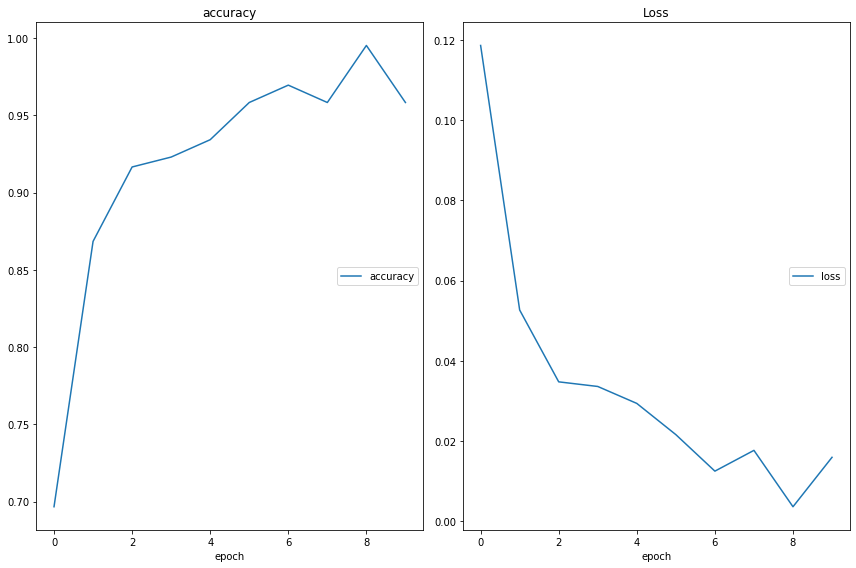

accuracy
	accuracy         	 (min:    0.697, max:    0.995, cur:    0.958)
Loss
	loss             	 (min:    0.004, max:    0.119, cur:    0.016)


In [75]:
from livelossplot import PlotLosses
#from livelossplot.outputs import MatplotlibPlot
#import PIL.Image

BATCH_SIZE = 8
num_epoch = 10

optimizer = torch.optim.Adam(model.parameters())
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)


def train_eval(is_training, num_epoch):
    liveloss = PlotLosses()
    global BATCH_SIZE, LEARNING_RATE, MOMENTUM, model, dataset, optimizer, train_button, accuracy_widget, loss_widget, progress_widget
    
    try:
        train_loader = torch.utils.data.DataLoader(
            dataset,
            batch_size=BATCH_SIZE,
            shuffle=True
        )


        time.sleep(1)

        if is_training:
            model = model.train()
        else:
            print("training mode error")
            break

        while num_epoch > 0:            
            logs = {}
            i = 0
            sum_loss = 0.0
            error_count = 0.0
            for images, labels in iter(train_loader):
                # send data to device
                images = images.to(device)
                labels = labels.to(device)

                if is_training:
                    # zero gradients of parameters
                    optimizer.zero_grad()

                # execute model to get outputs
                outputs = model(images)

                # compute loss
                loss = F.cross_entropy(outputs, labels)

                if is_training:
                    # run backpropogation to accumulate gradients
                    loss.backward()

                    # step optimizer to adjust parameters
                    optimizer.step()

                # increment progress
                error_count += len(torch.nonzero(outputs.argmax(1) - labels).flatten())
                count = len(labels.flatten())
                i += count
                sum_loss += float(loss)

            logs['loss'] = sum_loss / i  
            logs['accuracy'] = 1.0 - error_count / i
            liveloss.update(logs)    

            liveloss.send()
            if is_training:
                num_epoch = num_epoch - 1
            else:
                break
    except e:
        pass
    

train_eval(is_training=True, num_epoch = num_epoch)

<h1 style="background-color:#76b900;"></h1>

<center><img src="./images/DLI Header.png" alt="Header" style="width: 400px;"/></center>